# AGREGANDO RUIDO A IMAGENES: SAL Y PIMIENTA


## sal_vs_pimienta

- Recibe valores de tipo FLOAT Proporción de ruido de sal vs. pimienta para 's & p' en el rango [0, 1]. 
Los valores más altos representan más sal. Valor predeterminado: 0.5 (cantidades iguales)
    
## Cantidad

- De tipo FLOAT. Proporción de píxeles de imagen para reemplazar con ruido en el rango [0, 1]. 
Se usa en 'sal', 'pimienta' y 'sal&pimienta'. Valor predeterminado: 0.05
    
## np.random.randint

- Del módulo "numpy", la clase "random", y su atributo "randint". Utilizado para obtener "arrays" con valores de tipo INTEGER aleatorios.

Devuelve enteros aleatorios de la distribución "uniforme discreto" del tipo especificado en el intervalo "medio abierto" [bajo, alto]. Si alto es "NONE" (el valor predeterminado), los resultados son de [0, bajo).

- ## Sintaxis
    
    np.random.randint(5, size=(2, 4))
        
    Resultado:  array([[4, 0, 2, 1],[3, 2, 2, 0]])
    
## np.ceil

- Perteneciente al módulo "numpy". La clase "ceil", recibe su nombre de la palabra en ingles "ceiling" que en español significa techo. Esta clase, devuelve el entero más próximo de un valor de tipo flotante

- ## Sintaxis

    import numpu as np
    
    np.ceil(x)
    
- ## Ejemplo


    >>> a = np.array([-1.7, -1.5, -0.2, 0.2, 1.5, 1.7, 2.0])
    >>> np.ceil(a)
    array([-1., -1., -0.,  1.,  2.,  2.,  2.])
    
## coordenadas

- Utilizado para guardar los valores de las coordenadas de los vectores para "salt" y para "pepper"



In [22]:
import tensorflow as tf
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
IMAGE_SIZE = 224
def redimensionarImagenes(rutaDeArchivos):
    listaDeImagenes = []
    tf.reset_default_graph()
    imagenOriginal = tf.placeholder(tf.float32, (None, None, None))
    tf_img = tf.image.resize_images(imagenOriginal, (IMAGE_SIZE, IMAGE_SIZE), tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        # Each image is resized individually as different image may be of different size.
        
        for contador, rutaDeImagen in enumerate(rutaDeArchivos):
            print("Imagen # "+str(contador+1)+"/"+str(len(rutaDeArchivos))+" : "+str(rutaDeImagen))
            imagenDeEntrada = mpimg.imread(rutaDeImagen)[:, :, :3] # Do not read alpha channel.
            imagenConNuevoTamano = sess.run(tf_img, feed_dict = {imagenOriginal: imagenDeEntrada})
            imagenReparada= np.multiply(imagenConNuevoTamano, 1.0 / 255.0)
            listaDeImagenes.append(imagenReparada)
    listaDeImagenes = np.array(listaDeImagenes, dtype = np.float32) # Convert to numpy
    return listaDeImagenes

# Obtener imagenes
X_imgs = redimensionarImagenes(['/notebooks/imagenes/frutas/mango_1.jpg','/notebooks/imagenes/frutas/mango_2.jpg','/notebooks/imagenes/frutas/naranja_1.jpg'])

Imagen # 1/4 : /notebooks/imagenes/frutas/mango_1.jpg
Imagen # 2/4 : /notebooks/imagenes/frutas/mango_2.jpg
Imagen # 3/4 : /notebooks/imagenes/frutas/naranja_1.jpg
Imagen # 4/4 : /notebooks/imagenes/frutas/rojo.jpg


In [23]:
def agregar_sal_pimienta(listaDeImagenes):
    X_imgs_copy = X_imgs.copy() # Se crea una copia del paquete de imagenes de "listaDeImagenes"
    row, col, _ = X_imgs_copy[0].shape # Se obtiene el valor de la forma de la imagen con ".shape"
    sal_vs_pimienta = 0.5
    cantidad = 0.004
    numeroDePixelesDeSal = np.ceil(cantidad * X_imgs_copy[0].size * sal_vs_pimienta) #Variable que guarda el número de pixeles que cambiarán a blanco
    numeroDePixelesDepimienta = np.ceil(cantidad * X_imgs_copy[0].size * (1.0 - sal_vs_pimienta)) #Variable que guarda el número de pixeles que cambiarán a negro
    # Mostramos los valores contenidos en las variables
    print "Cantidad de sal: " ,numeroDePixelesDeSal
    print "Cantidad de pimienta: ",numeroDePixelesDepimienta
    
    #Ciclo "For" para aplicar los cambios en las imagenes
    for X_img in listaDeImagenes:
        # Agregando ruido de sal
        coordenadas = [np.random.randint(0, i - 1, int(numeroDePixelesDeSal)) for i in X_img.shape] #Selecciona pixeles al azar para aplicar la variable "numeroDePixlesDeSal"
        X_img[coordenadas[0], coordenadas[1], :] = 1

        # Agregando ruido de pimienta
        coordenadas = [np.random.randint(0, i - 1, int(numeroDePixelesDepimienta)) for i in X_img.shape] #Selecciona pixeles al azar para aplicar la variable "numeroDePixelesDePimienta"
        X_img[coordenadas[0], coordenadas[1], :] = 0
    return X_imgs_copy
  
salt_pepper_noise_imgs = agregar_sal_pimienta(X_imgs)

Cantidad de sal:  302.0
Cantidad de pimienta:  302.0


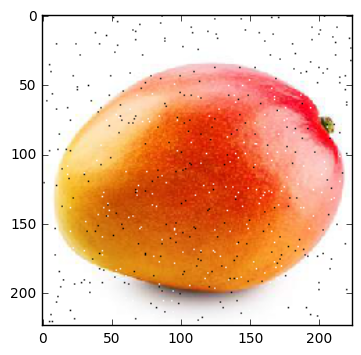

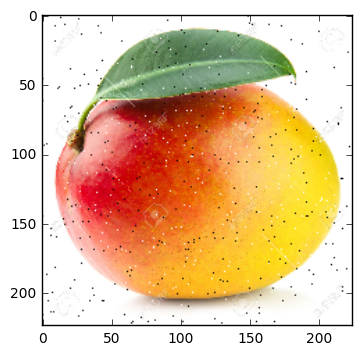

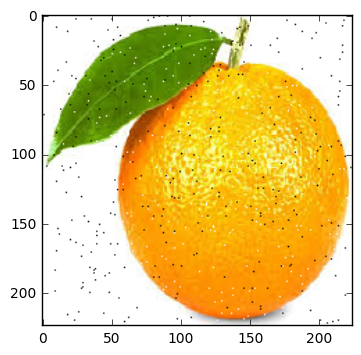

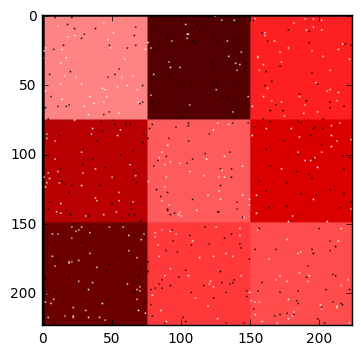

In [24]:
# Mostrar imagenes
    
for X_img in X_imgs:
    imgplot = plt.imshow(X_img)
    plt.show()
    
